# Home Price Prediction

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# Cargar los Datos
data = pd.read_csv(r"D:\Python\Housing Data\HousingData.csv")

# Visualizar las primeras líneas del Dataset
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [34]:
# Mostrar información del dataset para entender sus columnas
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [35]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [37]:
# Conocer la estructura del dataset
print("Columnas del dataset:")
print(data.columns)

Columnas del dataset:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [38]:
# Valores Estadísticos Representativos
print("Descripción Estadística del Dataset:")
print(data.describe)

Descripción Estadística del Dataset:
<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  39

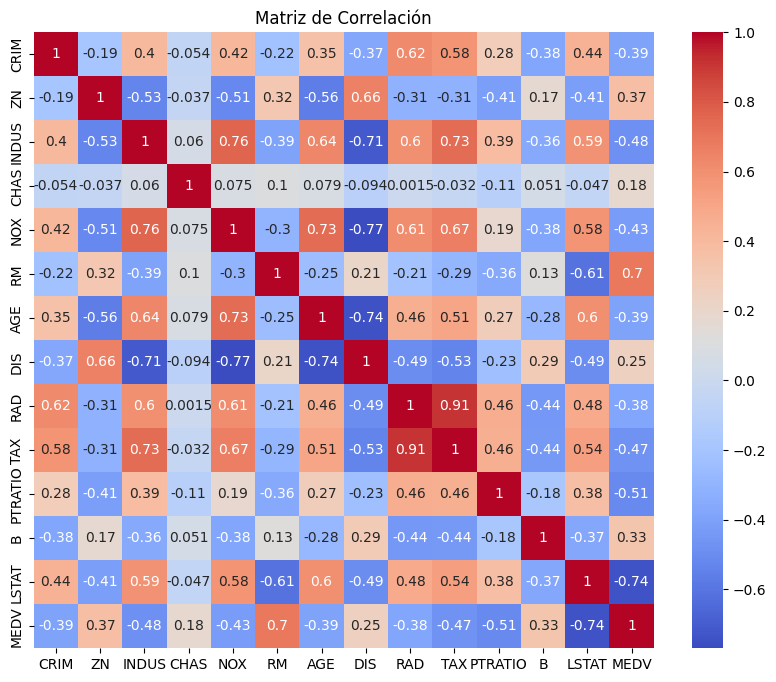

In [39]:
# Visualizar Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Matriz de Correlación

### Muestra la relación entre las variables predictoras y la variable objetivo (MEDV)

🔹 RM (número promedio de habitaciones) tiene una alta correlación positiva con MEDV (+0.7)

🔹 LSTAT (% de población con bajo nivel socioeconómico) tiene una alta correlación negativa con MEDV (-0.74)

🔹 Variables como TAX y AGE tienen menor correlación con MEDV

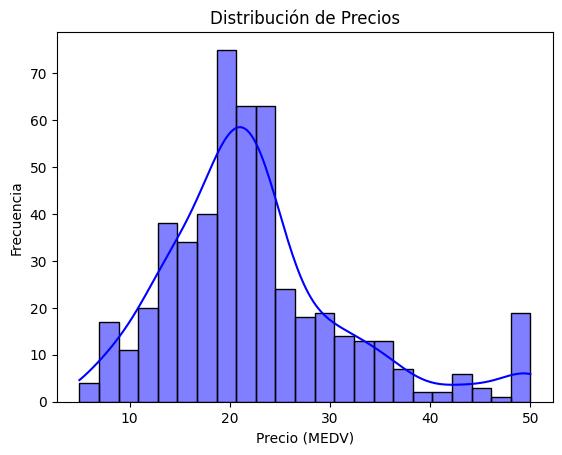

In [40]:
# Distribución del Precio de las Casas
sns.histplot(data['MEDV'], kde=True, color='blue')
plt.title("Distribución de Precios")
plt.xlabel("Precio (MEDV)")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del Precio de las Casas

### La distribución de MEDV tiene una ligera asimetría positiva (derecha)

🔹 Se observa que muchos precios alcanzan el límite superior de 50, lo que podría indicar truncamiento en los datos

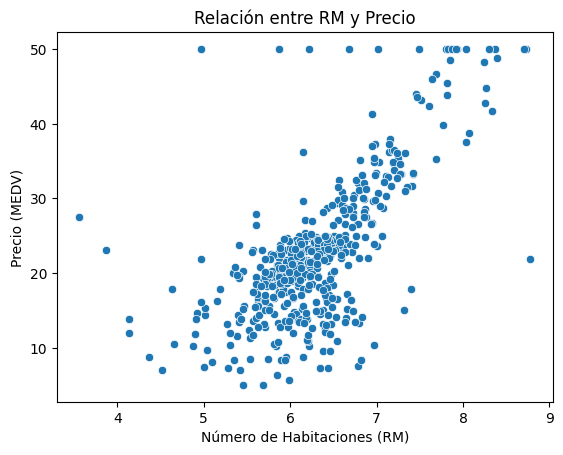

In [41]:
# Relación entre Número de Habitaciones y Precio
sns.scatterplot(x=data['RM'], y=data['MEDV'])
plt.title("Relación entre RM y Precio")
plt.xlabel("Número de Habitaciones (RM)")
plt.ylabel("Precio (MEDV)")
plt.show()

# Relación entre RM y Precio

🔹 La relación entre RM (habitaciones) y MEDV es positiva y aproximadamente lineal

🔹 Casas con más habitaciones tienden a tener precios más altos, lo que sugiere que RM es una variable importante para el modelo

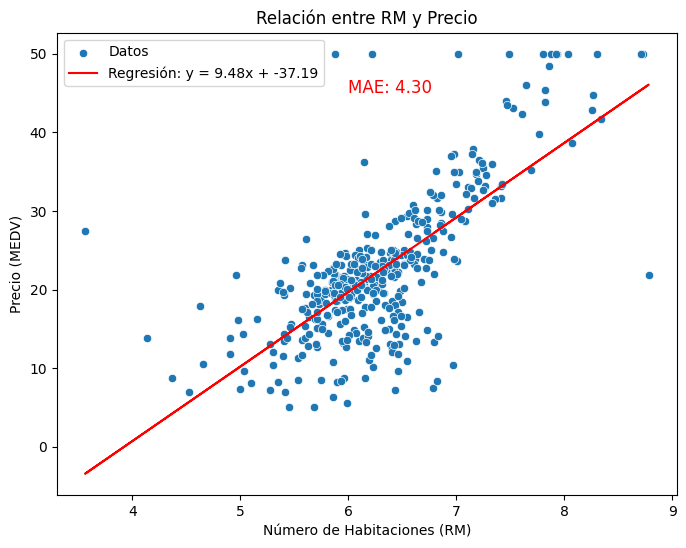

In [54]:
# Seleccionar las variables de interés
X = data[['RM']]  # Número de habitaciones como variable independiente
y = data['MEDV']  # Precio como variable dependiente

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Coeficientes de la recta
coef = model.coef_[0]
intercept = model.intercept_

# Fórmula de la regresión
formula = f"y = {coef:.2f}x + {intercept:.2f}"

# Calcular el error
mae = mean_absolute_error(y, y_pred)

# Graficar los puntos y la línea de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['RM'], y=data['MEDV'], label="Datos")
plt.plot(data['RM'], y_pred, color="red", label=f"Regresión: {formula}")
plt.title("Relación entre RM y Precio")
plt.xlabel("Número de Habitaciones (RM)")
plt.ylabel("Precio (MEDV)")
plt.legend()

# Mostrar el error en el gráfico
plt.text(6, 45, f"MAE: {mae:.2f}", fontsize=12, color="red")
plt.show()

In [42]:
data = data.dropna()

In [44]:
# Nueva verificación si hay valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [63]:
# Preprocesamiento de Datos
X = data.drop('MEDV', axis=1)  # Variables independientes
y = data['MEDV']  # Variable dependiente (precio de la vivienda)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (315, 13), X_test: (79, 13)
y_train: (315,), y_test: (79,)


In [64]:
# Importar la librería
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar la normalización a los datos de entrenamiento y prueba
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirmar que la normalización fue aplicada correctamente
print("Primeras filas de X_train después de la normalización:")
print(X_train[:5])

Primeras filas de X_train después de la normalización:
[[ 0.30669463 -0.46905615  0.98516338 -0.28065481  1.37188168 -0.37653767
   0.90750227 -0.90099411  1.61225391  1.46492489  0.75107471 -0.38387457
   0.35489258]
 [-0.35506872 -0.46905615 -0.75170852 -0.28065481 -0.44702784  2.93569199
   0.12372975  0.04880576 -0.20884867 -0.61128806 -0.55527097  0.32304459
  -1.38799511]
 [-0.40275616 -0.46905615  0.37069021  3.56309587 -0.07634959 -0.45468981
   0.85406323 -0.41023032 -0.5503054  -0.79057107 -1.02182299  0.44088232
   0.64734992]
 [-0.4043543  -0.46905615  0.21597725 -0.28065481 -1.05045753  0.02132775
  -0.88448673  0.3700488  -0.5503054  -0.08500567  0.05124667  0.29430891
  -0.53565321]
 [ 0.54975484 -0.46905615  0.98516338 -0.28065481  1.56153102 -0.91507695
   0.85762584 -0.92875585  1.61225391  1.46492489  0.75107471  0.44088232
   1.30076813]]


In [65]:
# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento normalizados
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar las primeras predicciones junto con los valores reales
comparison = pd.DataFrame({'Real': y_test.values, 'Predicción': y_pred})
print("\nComparación entre valores reales y predicciones:")
print(comparison.head())


Comparación entre valores reales y predicciones:
   Real  Predicción
0  25.0   29.228502
1  18.6   17.503747
2  21.0   21.808038
3  23.5   30.494253
4  17.5   18.502655


In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Verificar tamaños
print(f"Tamaño de y_test: {len(y_test)}")
print(f"Tamaño de y_pred: {len(y_pred)}")

Tamaño de y_test: 79
Tamaño de y_pred: 79


In [68]:
# Calcular métricas de evaluación

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"\n📊 Evaluación del Modelo:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Evaluación del Modelo:
MAE (Error Absoluto Medio): 3.37
MSE (Error Cuadrático Medio): 31.45
R² Score: 0.63


# Análisis de las Métricas

### MAE (Error Absoluto Medio): 3.37  
🔹 En promedio, el modelo se equivoca por **3.37 unidades** en la predicción del precio de las casas.

### MSE (Error Cuadrático Medio): 31.45  
🔹 Penaliza más los errores grandes, pero es menos intuitivo que el MAE.

### R² Score: 0.63  
🔹 El modelo explica **el 63% de la variabilidad** en el precio de las casas.  
🔹 Un valor , más cercano a **1 nos indicaría mejor precisión**.

> **📌 Un R² = 0.63 El modelo tiene un rendimiento moderado, pero hay margen de mejora.**